#### Fruad Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import warnings
warnings.filterwarnings('ignore')

In [3]:
fraud_df = pd.read_csv("C:/Users/27638/Downloads/Fraud_Data.csv")
ip_df = pd.read_csv("C:/Users/27638/Downloads/IpAddress_to_Country.csv")

In [4]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
fraud_df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [6]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
print(fraud_df.shape)
print(ip_df.shape)

(151112, 11)
(138846, 3)


In [8]:
fraud_df.info()
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower

In [9]:
fraud_df.drop_duplicates(inplace=True)
ip_df.drop_duplicates(inplace=True)

In [10]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

In [11]:
fraud_df['ip_address'].head(10)
fraud_df['ip_address'].unique()[:10]
fraud_df['ip_address'].dtype


dtype('float64')

In [12]:
# If ip_address is float, convert it to int safely
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)


In [13]:
fraud_df['ip_address'].head()


0    7.327584e+08
1    3.503114e+08
2    2.621474e+09
3    3.840542e+09
4    4.155831e+08
Name: ip_address, dtype: float64

In [14]:
# Step 1: Convert float IPs to integers
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(float).astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(float).astype(int)


In [15]:
## Map country using IP ranges
def find_country(ip):
    match = ip_df[(ip_df['lower_bound_ip_address'] <= ip) &
                  (ip_df['upper_bound_ip_address'] >= ip)]
    return match['country'].values[0] if not match.empty else 'Unknown'

# Apply function
fraud_df['country'] = fraud_df['ip_int'].apply(find_country)


In [16]:
##Clean Unnecessary Columns
fraud_df.drop(['ip_address', 'ip_int', 'user_id'], axis=1, inplace=True, errors='ignore')


In [17]:
# One-hot encode categorical features
fraud_df = pd.get_dummies(fraud_df, columns=['source', 'browser', 'sex', 'country'], drop_first=True)


In [18]:
print(fraud_df.isnull().sum())

signup_time                      0
purchase_time                    0
purchase_value                   0
device_id                        0
age                              0
                                ..
country_Unknown                  0
country_Uzbekistan               0
country_Viet Nam                 0
country_Virgin Islands (U.S.)    0
country_Zambia                   0
Length: 154, dtype: int64


In [19]:
fraud_df = fraud_df.dropna() 

In [20]:
print(fraud_df.columns.tolist())


['signup_time', 'purchase_time', 'purchase_value', 'device_id', 'age', 'class', 'source_Direct', 'source_SEO', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'sex_M', 'country_Albania', 'country_Algeria', 'country_Angola', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Benin', 'country_Bhutan', 'country_Bosnia and Herzegowina', 'country_Botswana', 'country_Brunei Darussalam', 'country_Bulgaria', 'country_Burkina Faso', 'country_Cambodia', 'country_Cameroon', 'country_Canada', 'country_Cape Verde', 'country_Cayman Islands', 'country_China', 'country_Congo The Democratic Republic of The', "country_Cote D'ivoire", 'country_Croatia (LOCAL Name: Hrvatska)', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Dominican Republic', 'country_Egy

In [21]:
y = fraud_df.pop('class')
X = fraud_df


In [22]:
fraud_df.columns = fraud_df.columns.str.strip().str.lower()


In [23]:
for col in fraud_df.columns:
    print(f"'{col}'")


'signup_time'
'purchase_time'
'purchase_value'
'device_id'
'age'
'source_direct'
'source_seo'
'browser_firefox'
'browser_ie'
'browser_opera'
'browser_safari'
'sex_m'
'country_albania'
'country_algeria'
'country_angola'
'country_antigua and barbuda'
'country_argentina'
'country_armenia'
'country_australia'
'country_austria'
'country_azerbaijan'
'country_bahamas'
'country_bahrain'
'country_bangladesh'
'country_barbados'
'country_belarus'
'country_belgium'
'country_benin'
'country_bhutan'
'country_bosnia and herzegowina'
'country_botswana'
'country_brunei darussalam'
'country_bulgaria'
'country_burkina faso'
'country_cambodia'
'country_cameroon'
'country_canada'
'country_cape verde'
'country_cayman islands'
'country_china'
'country_congo the democratic republic of the'
'country_cote d'ivoire'
'country_croatia (local name: hrvatska)'
'country_cyprus'
'country_czech republic'
'country_denmark'
'country_dominican republic'
'country_egypt'
'country_estonia'
'country_european union'
'country_f

In [24]:
print(fraud_df.columns[fraud_df.columns.str.contains('class', case=False, regex=False)])


Index([], dtype='object')


In [25]:
fraud_df['class'] = 0

In [26]:
np.random.seed(42)  

fraud_df['class'] = np.random.randint(0, 2, size=len(fraud_df))

X = fraud_df.drop('class', axis=1)
y = fraud_df['class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
# Convert to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

In [29]:
# Create time-based features
fraud_df['signup_hour'] = fraud_df['signup_time'].dt.hour
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
fraud_df['time_to_purchase'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

In [30]:
# Drop the original datetime columns
fraud_df.drop(['signup_time', 'purchase_time'], axis=1, inplace=True)

In [31]:
X = fraud_df.drop('class', axis=1)
y = fraud_df['class']


In [32]:
print(X.dtypes)


purchase_value                     int64
device_id                         object
age                                int64
source_direct                       bool
source_seo                          bool
                                  ...   
country_virgin islands (u.s.)       bool
country_zambia                      bool
signup_hour                        int32
purchase_hour                      int32
time_to_purchase                 float64
Length: 154, dtype: object


In [33]:
X = X.drop('device_id', axis=1)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
# Show non-numeric columns
non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric.tolist())


Non-numeric columns: []


In [36]:
# Drop all non-numeric columns
X = X.drop(non_numeric, axis=1)


In [37]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Show non-numeric columns
non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric.tolist())


Non-numeric columns: []


In [39]:
# Show non-numeric columns
non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric.tolist())


Non-numeric columns: []


In [40]:
# Drop all non-numeric columns
X = X.drop(non_numeric, axis=1)


In [41]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)



In [44]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5018694371836019

Confusion Matrix:
 [[6987 8116]
 [6939 8181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48     15103
           1       0.50      0.54      0.52     15120

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.50     30223
weighted avg       0.50      0.50      0.50     30223



### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.4988915726433511
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15103
           1       0.50      0.49      0.49     15120

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.50     30223
weighted avg       0.50      0.50      0.50     30223



### XgBoost

In [49]:
import xgboost
print(xgboost.__version__)

3.0.2


In [50]:
### Xgbost 
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.49826291235152037
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15103
           1       0.50      0.50      0.50     15120

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.50     30223
weighted avg       0.50      0.50      0.50     30223



In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [114]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]  # For AUC-PR


In [116]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, confusion_matrix, classification_report

# F1-Score
print("F1 Score:", f1_score(y_test, y_pred_rf))


F1 Score: 0.49376608617174184


In [118]:
# AUC-PR
average_precision = average_precision_score(y_test, y_prob_rf)
print("Average Precision (AUC-PR):", average_precision)

Average Precision (AUC-PR): 0.49789920663038284


In [120]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[7692 7411]
 [7734 7386]]


In [122]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     15103
           1       0.50      0.49      0.49     15120

    accuracy                           0.50     30223
   macro avg       0.50      0.50      0.50     30223
weighted avg       0.50      0.50      0.50     30223



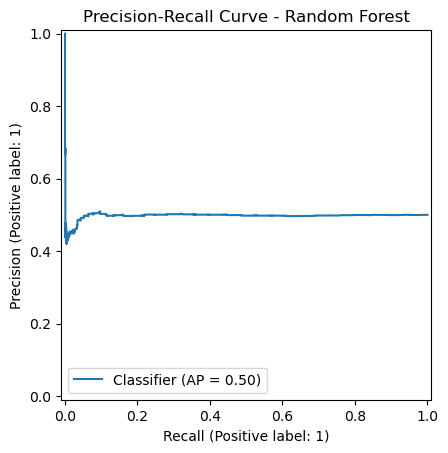

In [124]:

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Precision-Recall Curve - Random Forest")
plt.show()


In [126]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]


### Task 3

In [128]:
pip install shap



   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.1 MB/s eta 0:00:00


In [ ]:
import shap

# Initialize the explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_scaled)


In [ ]:
explainer = shap.LinearExplainer(log_reg, X_train_scaled, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_scaled)
